In [1]:
import pandas as pd
import os
import shutil
import random

In [34]:
# Dumping all images
data_dir = os.getcwd()+"/data/all_images/"

# Destination file
dest_dir = os.getcwd()+"/data/reorganized/"

In [32]:
#read Data from metadata
skin_df2 = pd.read_csv('data/HAM10000_metadata')
unwanted_label = ['vasc','df']
wanted_data = skin_df2.query("dx!=@unwanted_label")
label=wanted_data['dx'].unique().tolist()
min_pic_count = wanted_data['dx'].value_counts().min()
print(label)
print(min_pic_count)
label_images = []


['bkl', 'nv', 'mel', 'bcc', 'akiec']
327


In [35]:
# Copy images to new folders
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in random.sample(range(len(label_images)),min_pic_count):
        data = label_images[id]
        shutil.copyfile((data_dir + "/"+ data +".jpg"), (dest_dir + i + "/"+data+".jpg"))
    label_images=[]

In [2]:
from keras_preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

Found 1635 images belonging to 5 classes.


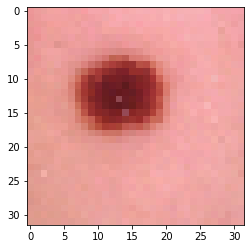

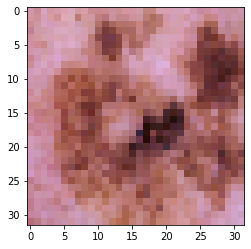

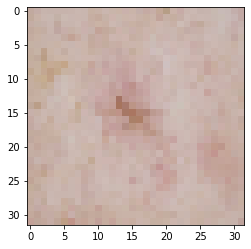

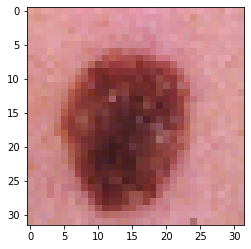

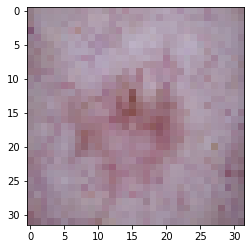

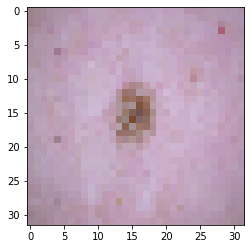

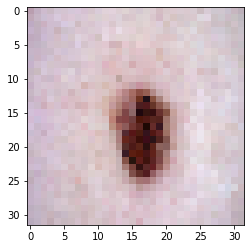

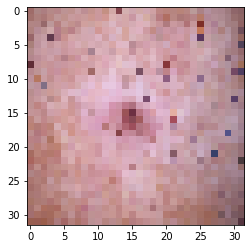

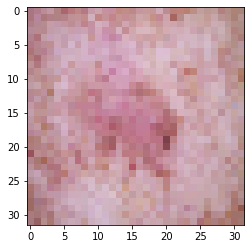

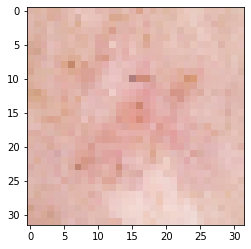

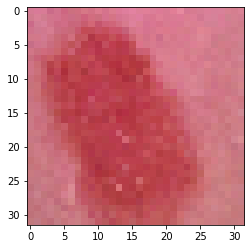

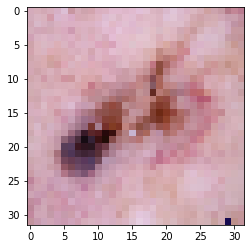

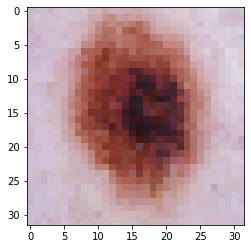

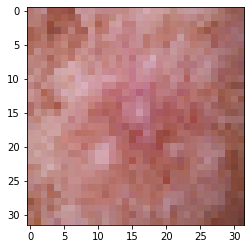

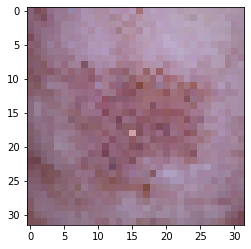

In [3]:
# Define datagen
datagen = ImageDataGenerator()

# define training directory that contains subfolders
train_dir = os.getcwd() + "/data/reorganized/"
# Use flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

# Check images for a single batch.
x, y = next(train_data_keras)

# View each image
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()